codImplementation of Grid files for storing and querying 2-dimensional data points.

Enter size of Bucket5
Enter Number of data point50
Enter range of X co-ordinate (point should be insclusive) 10
Enter range of Y co-ordinate (point should be insclusive) 10
Records Created


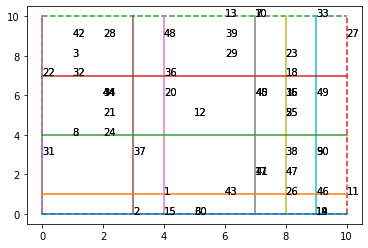

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

class grid_file():
    
    def __init__(self,B,N_data ,X_range,Y_range):
        self.B         = B
        self.N_data    =  N_data
        self.X_range   = X_range
        self.Y_range   = Y_range
        self.value     = [[0 for i in range(X_range+1)]for i in range(Y_range+1)]
        self.X         = [(0,X_range)]
        self.Y         = [(0,Y_range)]
        self.data_dict ={}
        self.data_dict[(0,X_range),(0,Y_range)]=[]
        self.splited_axis = 0
        self.axes=0
        
        
    def create_data(self):
        Table = open("data.txt","w")
        for ID in range(1,self.N_data+1):
            x = random.randint(0,self.X_range)
            y = random.randint(0,self.Y_range)
            Table.write("{},{},{}\n".format(ID,x,y))

        Table.close()
        print("Records Created")
        
        
    def is_overflow(self,arr,X_cor,Y_cor): 
        arr = [tuple(i[1:]) for i in arr]
        arr.append((X_cor,Y_cor))
        overflow = False  
        elements_count = {}
        for element in arr:
            if element in elements_count:

                elements_count[element] += 1
            else:

                elements_count[element] = 1
        for key, value in elements_count.items():

            if(value > self.B):
                overflow = True
                break

        return overflow
        
                    
    def print_data(self):
        for i in range(self.Y_range+1):
            print(self.value[i])
            
            
    def get_X_Y_range(self,X_cor,Y_cor):
        
        for i in self.X:
            if i[0]<=X_cor<=i[1]:
                X=i
                break
                
        for i in self.Y:
            if i[0]<=Y_cor<=i[1]:
                Y=i
                break
                
        return X,Y
    
    def split(self,X,Y):
        if(  ((X[1]-X[0])==0) and ((Y[1]-Y[0])==0)  ):  #spliting of a point
            return False
        
        if(self.axes[0]=="x"):
    
            if((X[1]-X[0])==1): #no use of axes
                self.data_dict[(X[0],X[0]),(Y[0],Y[1])] = [ i for i in self.data_dict[X,Y] if  X[0] == i[1]]
                self.data_dict[(X[1],X[1]),(Y[0],Y[1])] = [ i for i in self.data_dict[X,Y] if  X[1] == i[1]]
                self.data_dict.pop(((X,Y)))
                self.splited_axis="x"
                return True
                
            elif((X[1]-X[0])==0 or self.axes[1]==X[1]):
                self.axes=("y",self.axes[2],self.axes[1])
                if(self.split(X,Y)):
                    return True
                else:
                    return False
                    
                
            else:   
            
                self.data_dict[(X[0],self.axes[1]),(Y[0],Y[1])]   = [ i for i in self.data_dict[X,Y] if  X[0]<= i[1] <= self.axes[1]]
                self.data_dict[(self.axes[1]+1,X[1]),(Y[0],Y[1])] = [ i for i in self.data_dict[X,Y] if (self.axes[1]+1) <= i[1] <= X[1]]
                self.data_dict.pop(((X,Y)))
                self.splited_axis="x"
                return True
                
        if(self.axes[0]=="y"):
                
            if((Y[1]-Y[0])==1):
                self.data_dict[(X[0],X[1]),(Y[0],Y[0])] = [ i for i in self.data_dict[X,Y] if  Y[0] == i[2]]
                self.data_dict[(X[0],X[1]),(Y[1],Y[1])] = [ i for i in self.data_dict[X,Y] if  Y[1] == i[2]]
                self.data_dict.pop(((X,Y)))
                self.splited_axis="y"
                return True
            
            elif((Y[1]-Y[0])==0 or self.axes[1]==Y[1]):
                self.axes=("x",self.axes[2],self.axes[1])
                if(self.split(X,Y)):
                    return True
                else:
                    return False

            else:    
            
                self.data_dict[(X[0],X[1]),(Y[0],self.axes[1])]   = [ i for i in self.data_dict[X,Y] if  Y[0]<= i[2] <= self.axes[1]]
                self.data_dict[(X[0],X[1]),(self.axes[1]+1,Y[1])] = [ i for i in self.data_dict[X,Y] if (self.axes[1]+1) <= i[2]<=Y[1]]
                self.data_dict.pop(((X,Y)))
                self.splited_axis = "y"
                return True
            
            
    def split_X_Y(self,X,Y):
        if(self.splited_axis=="x"):
            if((X[1]-X[0])==1):
                ind = self.X.index((X))
                self.X.remove(X)
                self.X.insert(ind,  (X[0],X[0]))
                self.X.insert(ind+1,(X[1],X[1]))
                    
            else:
                ind = self.X.index((X))
                self.X.remove(X)
                self.X.insert(ind,(X[0],self.axes[1]))
                self.X.insert(ind+1,(self.axes[1]+1,X[1]))
                
        if(self.splited_axis=="y"):

            if((Y[1]-Y[0])==1):
                ind = self.Y.index((Y))
                self.Y.remove(Y)
                self.Y.insert(ind,  (Y[0],Y[0]))
                self.Y.insert(ind+1,(Y[1],Y[1]))

            else:
                ind = self.Y.index((Y))
                self.Y.remove(Y)
                self.Y.insert(ind,(Y[0],self.axes[1]))
                self.Y.insert(ind+1,(self.axes[1]+1,Y[1]))
            
                
            
        
        
          
                    
    def insert_data(self,ID,X_cor,Y_cor):
        X,Y = self.get_X_Y_range(X_cor,Y_cor)
        splited = False
        self.splited_axis=0
        self.axes=0
        #print("X,Y = ",X,Y)
        
       # print("X_cor ={},Y_cor={},value of overflow is ={} ".format(X_cor,Y_cor,self.is_overflow(self.data_dict[X,Y],X_cor,Y_cor)))
        
        if(self.is_overflow(self.data_dict[X,Y],X_cor,Y_cor)):
            return False
  
        self.value[X_cor][Y_cor]+=1
        
        self.data_dict[X,Y].append([ID,X_cor,Y_cor])
  
        if(len(self.data_dict[X,Y]) > self.B ):
        
            self.get_axis(X,Y)
                           
           # print(self.axes)
            
            if(self.axes[0] == "x" and (X[1]-X[0])!=0):                    
                for y in self.Y:
                    splited = self.split(X,y)
                    if(splited == False ):
                        return False
                    
                self.split_X_Y(X,Y)       
                                             
            elif(self.axes[0] == "y" and (Y[1]-Y[0])!=0):
                for x in self.X:
                    splited = self.split(x,Y)
                    if(splited == False ):
                        return False
                    
                self.split_X_Y(X,Y)    
                            
            elif((X[1]-X[0])==0):
                self.axes = ("y",self.axes[2],self.axes[1])
                for x in self.X:
                    splited = self.split(x,Y)
                    if(splited == False ):
                        return False
                    
                self.split_X_Y(X,Y)                    
                    
            elif((Y[1]-Y[0])==0):
                self.axes = ("x",self.axes[2],self.axes[1])
                for y in self.Y:
                    splited = self.split(X,y)
                    if(splited == False ):
                        return False
                    
                self.split_X_Y(X,Y)
                  
            else:
                print("i dont know what to do")

        return True
                
                           
    def get_axis(self,X,Y):
        x_cord = []
        y_cord = []
        for i in range(X[0],X[1]+1):
            for j in range(Y[0],Y[1]+1):
                if(self.value[i][j] != 0):
                    x_cord.append(i)
                    y_cord.append(j)          
                          
        x_med = int(np.median(x_cord))
        y_med = int(np.median(y_cord))
        if(x_med<=y_med): 
            self.axes = ("x",x_med,y_med)
        else:
            self.axes =  ("y",y_med,x_med)
        

        
B = int(input("Enter size of Bucket"))
N_data = int(input("Enter Number of data point"))
X_range = int(input("Enter range of X co-ordinate (point should be insclusive) "))
Y_range = int(input("Enter range of Y co-ordinate (point should be insclusive) "))
ovrfill_dict={}
k=0

#####################################################################
g = grid_file(B,N_data,X_range,Y_range)
g.create_data()
file = open("data.txt","r")

for _ in range(N_data):
    data = file.readline().split("\n")[0].split(",")
    inserted = g.insert_data(int(data[0]),int(data[1]),int(data[2]))
    if(inserted==False):
        X,Y = g.get_X_Y_range(int(data[1]),int(data[2]))
        if (X,Y) in ovrfill_dict:
            ovrfill_dict[(X,Y)].append([int(data[0]),int(data[1]),int(data[2])])
        else:
            ovrfill_dict[(X,Y)] = [[int(data[0]),int(data[1]),int(data[2])]]
                                
for key, value in g.data_dict.items():
    if(len(value)>0):
        k+=1
        file = open("".join(["Bucket_",str(k),".txt"]),"w")
        for i in range(len(value)):
            file.write("{},{},{} \n".format(value[i][0],value[i][1],value[i][2]))
        if key in ovrfill_dict:
            file.write("".join(["Bucket_chaining_",str(k),"_",str(1),".txt"]))
            file.close()
            
            Number_of_blocks = math.ceil( len(ovrfill_dict[key])/B)            
            for i in range(1,Number_of_blocks+1):
                file1 = open("".join(["Bucket_chaining_",str(k),"_",str(i),".txt"]),"w" )                                
                if(i!=Number_of_blocks):
                    for j in range(B):
                        file1.write("{},{},{} \n".format(ovrfill_dict[key][0][0],ovrfill_dict[key][0][1],ovrfill_dict[key][0][2]))
                        ovrfill_dict[key].pop(0)
                    file1.write("".join(["Bucket_chaining_",str(k),"_",str(i+1),".txt"]))
                       
                if(i==Number_of_blocks):
                    for l in range(len(ovrfill_dict[key])):
                        file1.write("{},{},{} \n".format(ovrfill_dict[key][l][0],ovrfill_dict[key][l][1],ovrfill_dict[key][l][2]))                                              
                    file1.write("NULL")
                file1.close()
                       
                       
        else:
            file.write("NULL")
            file.close()                        
                                                   
plt.plot((0,X_range),(0,0),linestyle='dashed') 
plt.plot((0,0),(0,X_range),linestyle='dashed') 
plt.plot((0,X_range),(Y_range,Y_range),linestyle='dashed') 
plt.plot((X_range,X_range),(0,Y_range),linestyle='dashed')

for x in g.X:
    plt.plot((x[0],x[0]),(0,g.X_range))
for y in g.Y:
    plt.plot((0,g.Y_range),(y[0],y[0]))
            

for key, value in g.data_dict.items():
    for j in value:
        plt.text(j[1],j[2],str(j[0]))
        
for key, value in g.data_dict.items():
    for j in value:
        plt.text(j[1],j[2],str(j[0]))        